In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('Loan Prediction.csv')

data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
data.shape

(252000, 13)

In [9]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [11]:
data['Risk_Flag'].value_counts(normalize = True)

Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'CURRENT_JOB_YRS'}>,
        <Axes: title={'center': 'CURRENT_HOUSE_YRS'}>],
       [<Axes: title={'center': 'Risk_Flag'}>, <Axes: >, <Axes: >]],
      dtype=object)

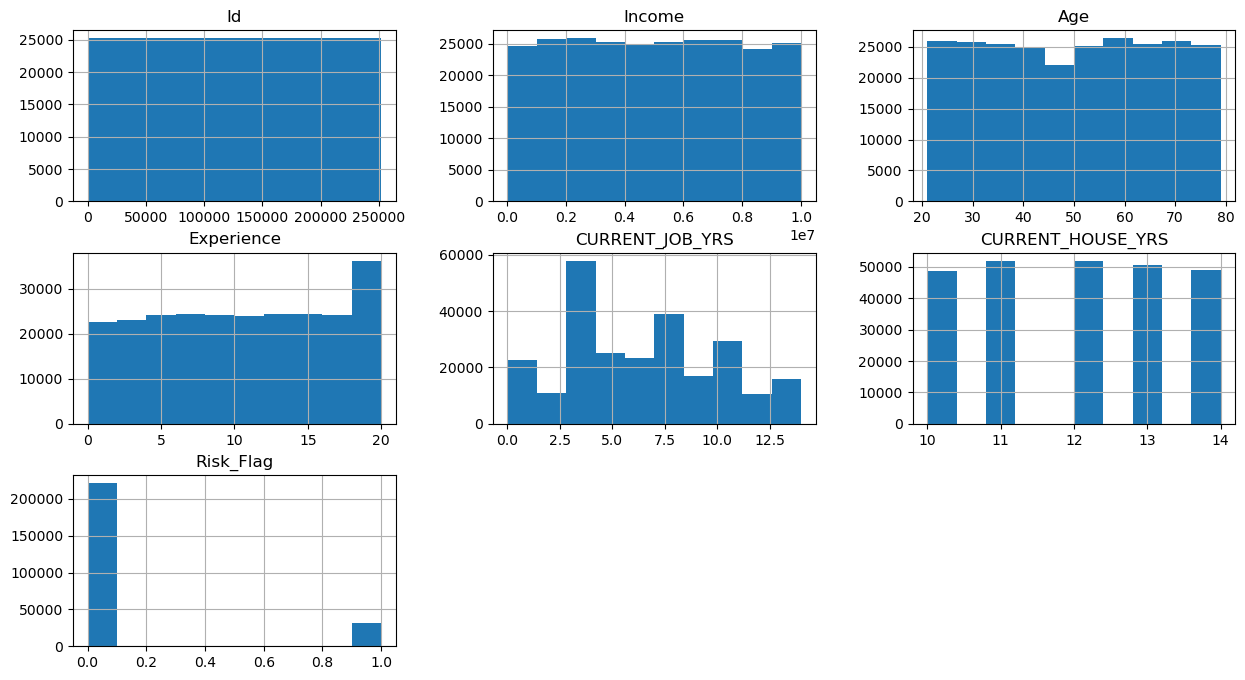

In [15]:
data.hist(figsize = (15,8))

Splitting dataset

In [5]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [5]:
label_encoder = LabelEncoder()
data['Married/Single'] = label_encoder.fit_transform(data['Married/Single'])
data['Car_Ownership'] = label_encoder.fit_transform(data['Car_Ownership'])
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
data = pd.get_dummies(data, columns = ['House_Ownership', 'Profession', 'CITY', 'STATE'], drop_first = True)

In [9]:
X = data.drop(columns = 'Risk_Flag', axis = 1)
y = data['Risk_Flag']

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
log = LogisticRegression(class_weight = 'balanced')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

accuarcy_log = accuracy_score(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)
con_mat = confusion_matrix(y_test, y_pred)

In [39]:
print(accuarcy_log)
print(clas_report)
print(con_mat)

0.5773148148148148
              precision    recall  f1-score   support

           0       0.92      0.57      0.70     66329
           1       0.17      0.62      0.27      9271

    accuracy                           0.58     75600
   macro avg       0.54      0.60      0.48     75600
weighted avg       0.82      0.58      0.65     75600

[[37860 28469]
 [ 3486  5785]]


In [ ]:
log_cv = cross_val_score(log, X, y, cv = 5)
print(log_cv)

C:\Users\Acer\anaconda3\Ana3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [47]:
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RF_model.fit(X_train, y_train)

RF_y_pred = RF_model.predict(X_test)

RFaccuarcy_log = accuracy_score(y_test, RF_y_pred)
RFclas_report = classification_report(y_test, RF_y_pred)
RFcon_mat = confusion_matrix(y_test, RF_y_pred)

In [45]:
print(RFaccuarcy_log)
print(RFclas_report)
print(RFcon_mat)

0.901441798941799
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     66329
           1       0.63      0.46      0.53      9271

    accuracy                           0.90     75600
   macro avg       0.78      0.71      0.74     75600
weighted avg       0.89      0.90      0.89     75600

[[63868  2461]
 [ 4990  4281]]


In [ ]:
RF_cv = cross_val_score(RF_model, X, y, cv = 5)
print(RF_cv)